## Time Seris Analysis : A statistical technique to analyze data collected over regular time intervals to understand patterns, trends and seasonal fluctuations.


### Time Series Analysis in Agriculture: 

- Purpose: Helps identify trends and predict future agricultural outcomes, such as crop yields, prices, or weather patterns.

- Components:
  - Trend: Long-term increase or decrease in agricultural data (e.g., rising crop yields over years).
  - Seasonality: Regular, predictable fluctuations (e.g., seasonal changes in crop prices or harvests).
  - Noise: Random variations that do not follow a pattern.

- Applications: 
  - Forecasting crop prices, yields, and weather conditions.
  - Identifying planting and harvest trends.
  - Making informed decisions in resource management.

- Data Examples: Crop yields, monthly rainfall data, agricultural commodity prices, and temperature patterns.

- Usefulness: Enables farmers, policymakers, and agricultural businesses to plan and make decisions based on anticipated future conditions.

## Time Series Analysis in Agriculture: ARIMA MODEL (AutoRegressive Integrated Moving Average)

Number of input data samples: 2000
DataFrame Shape: (2000, 1)

DataFrame Describe:
        Crop_Price
count  2000.000000
mean    150.225421
std      24.414677
min      91.492422
25%     134.535245
50%     150.596867
75%     165.789672
max     212.271394

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2010-01-31 to 2176-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop_Price  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB
None

Initial Data:
            Crop_Price
Date                  
2010-01-31  102.483571
2010-02-28   99.390135
2010-03-31  103.401356
2010-04-30  107.859518
2010-05-31   99.155056


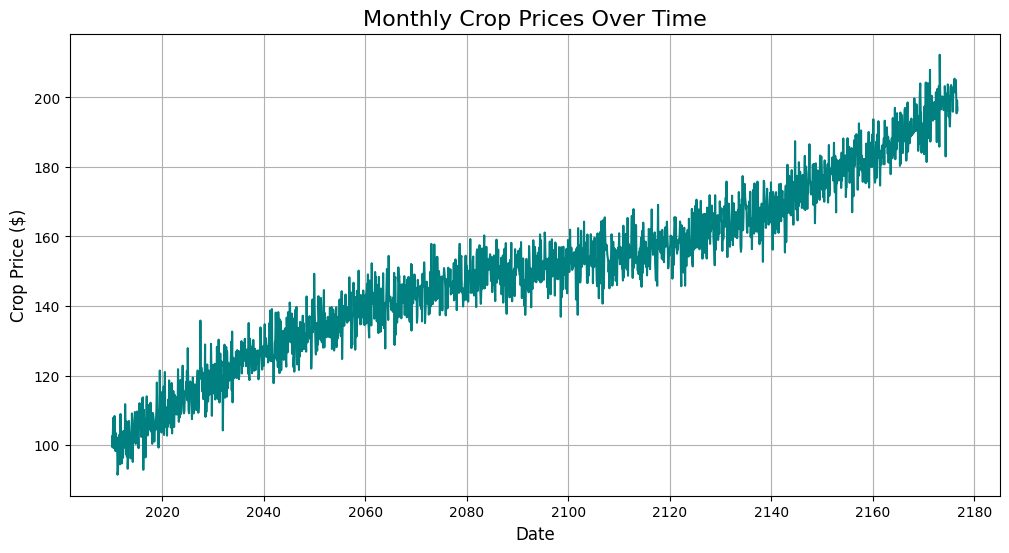

Dickey-Fuller Test on Crop Prices:
ADF Statistic: -0.4794213028621497
p-value: 0.8959701172557148
The data is non-stationary (Fail to reject H0).


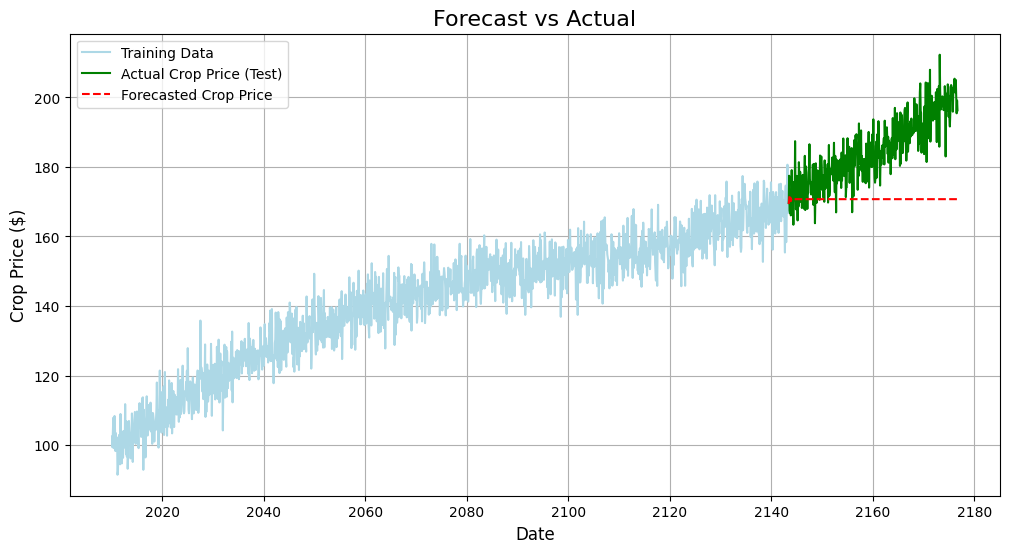

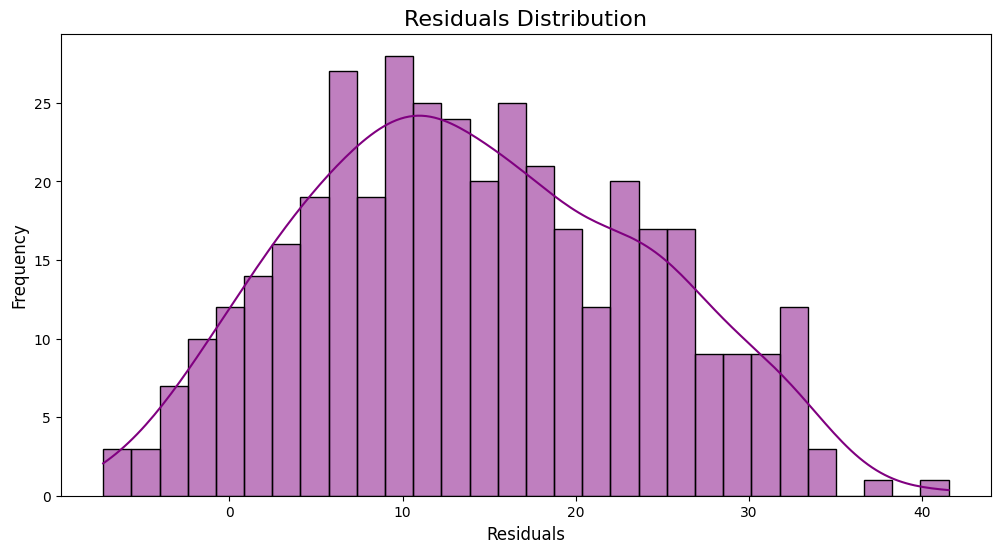

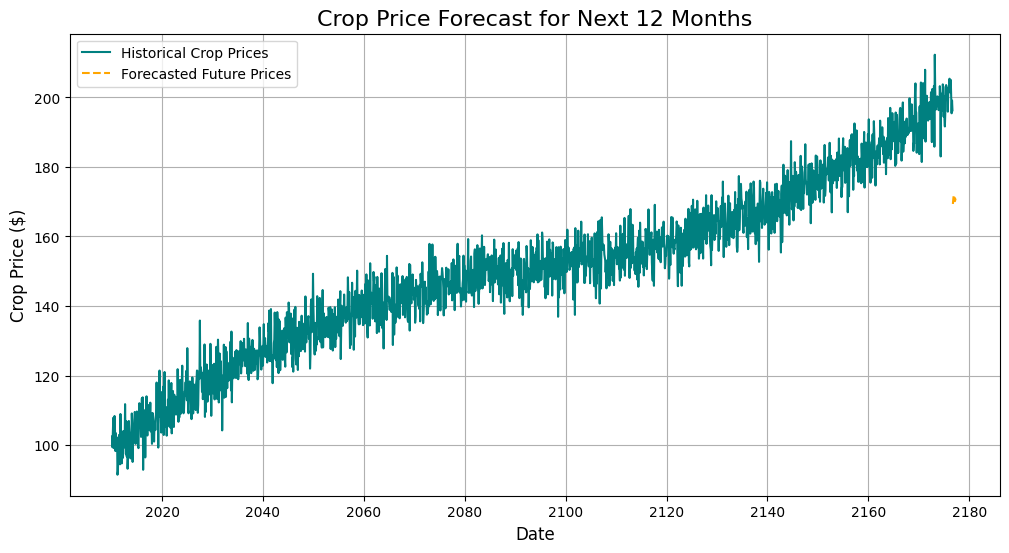

<Figure size 1200x800 with 0 Axes>

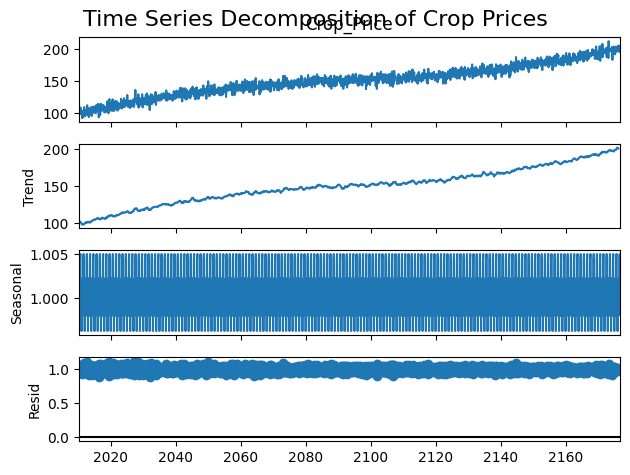

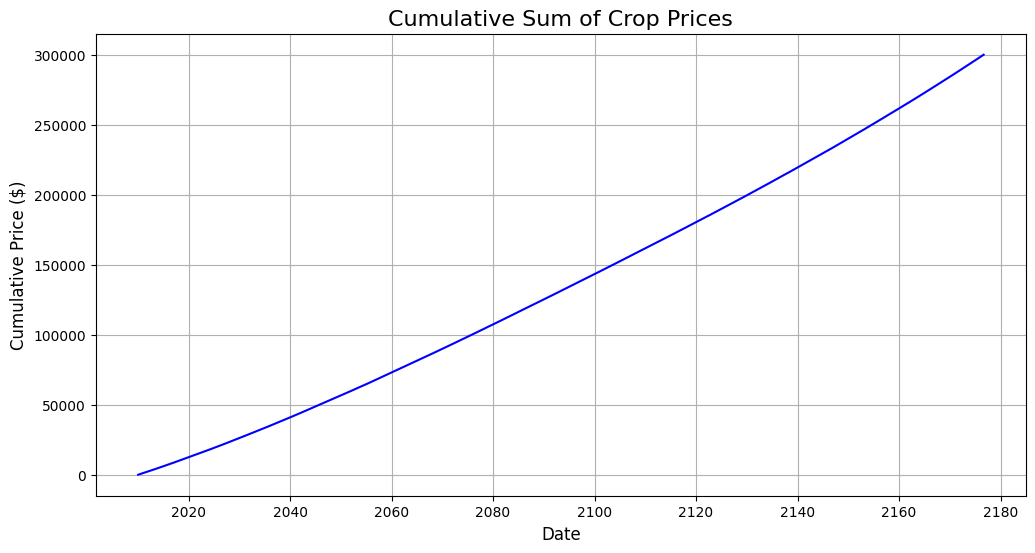

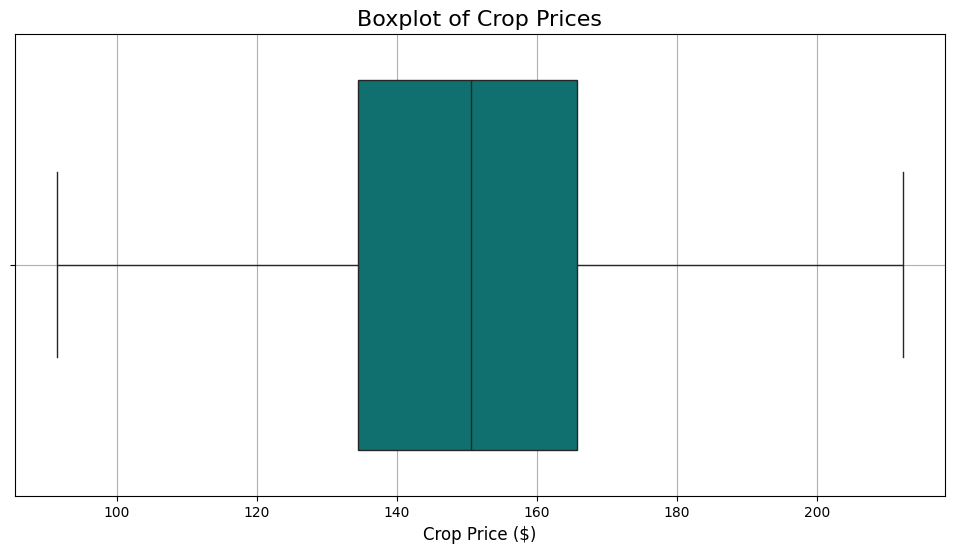

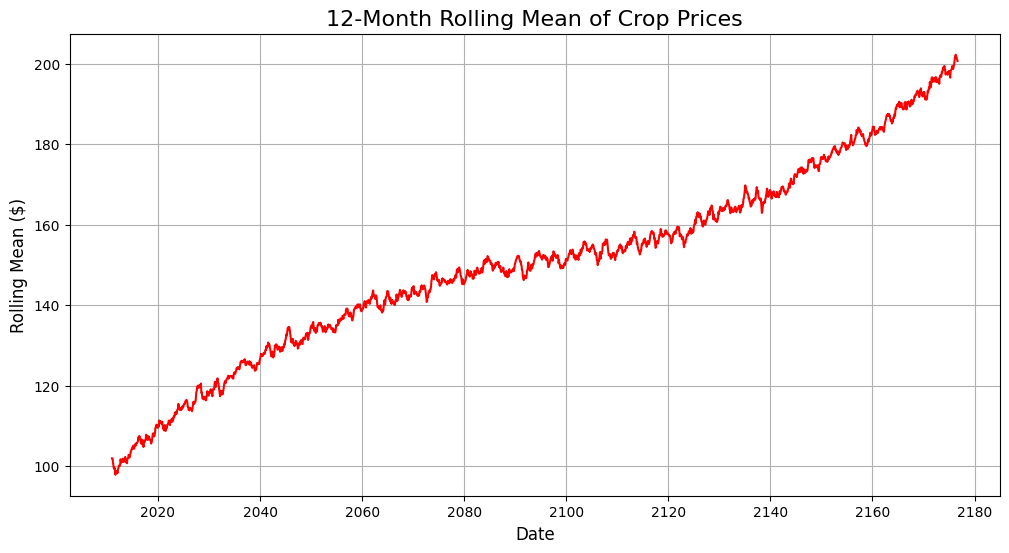

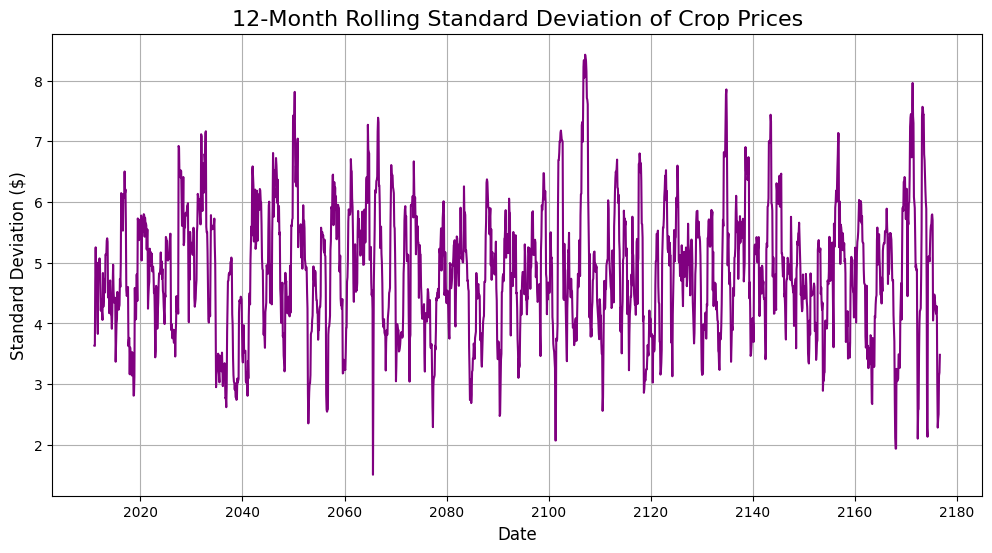

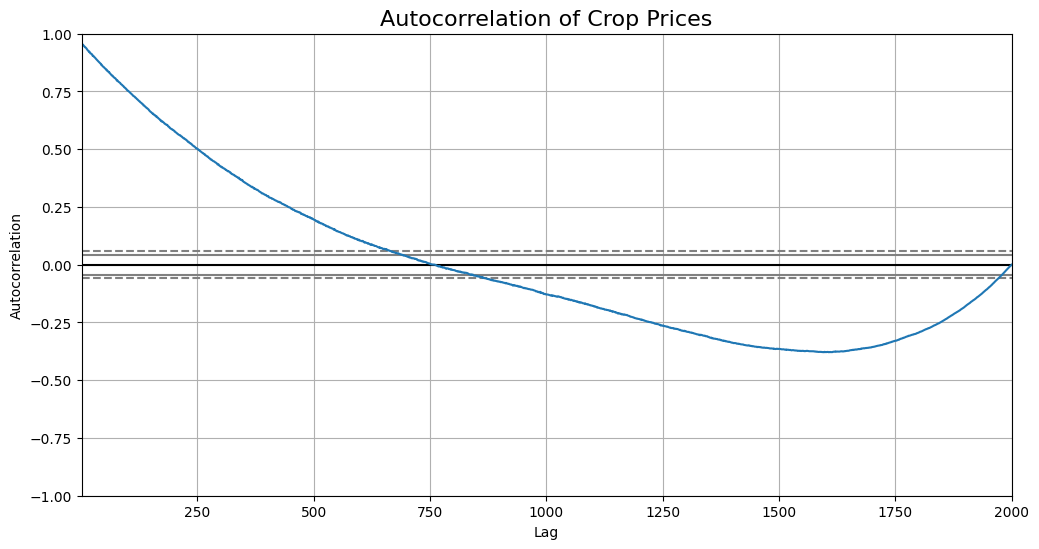

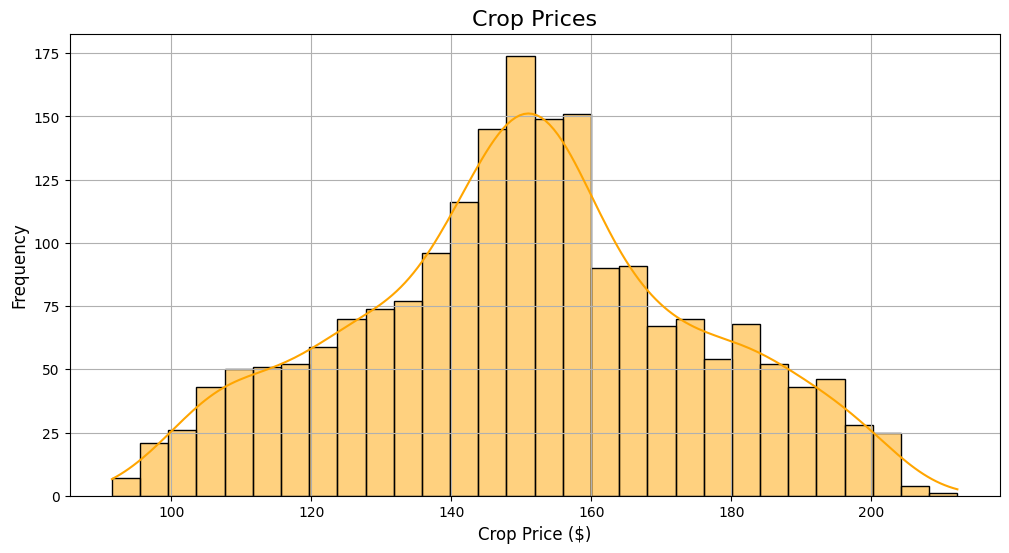

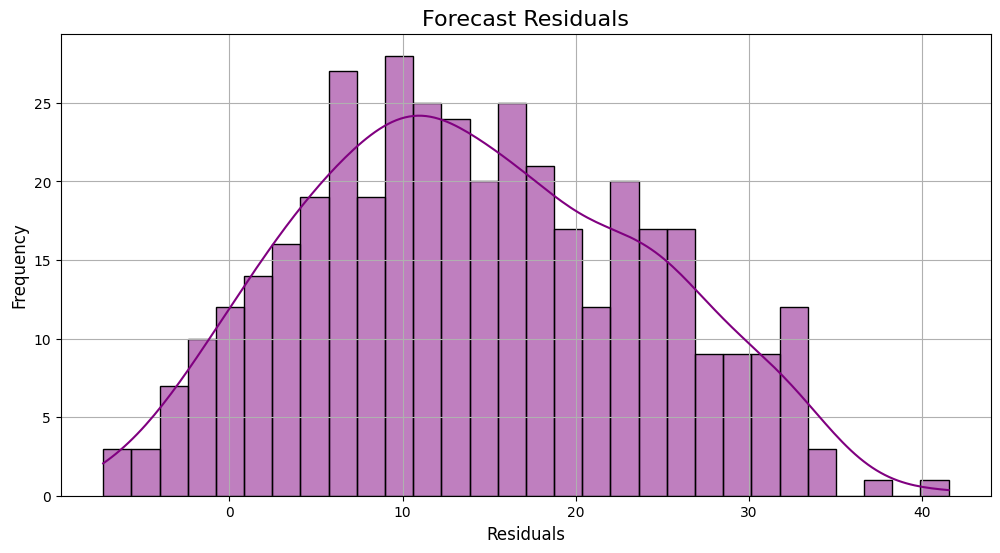

<Figure size 1200x800 with 0 Axes>

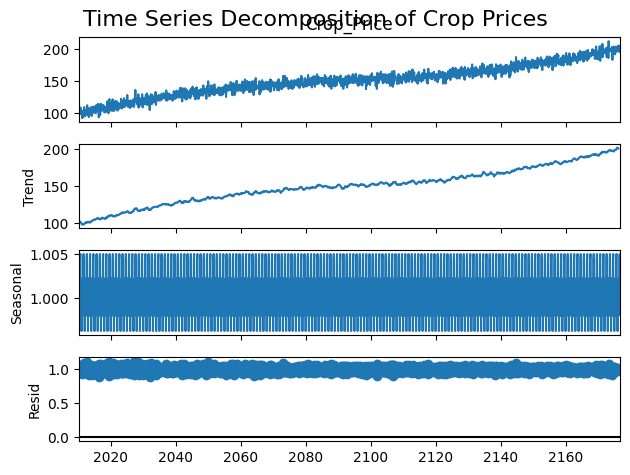

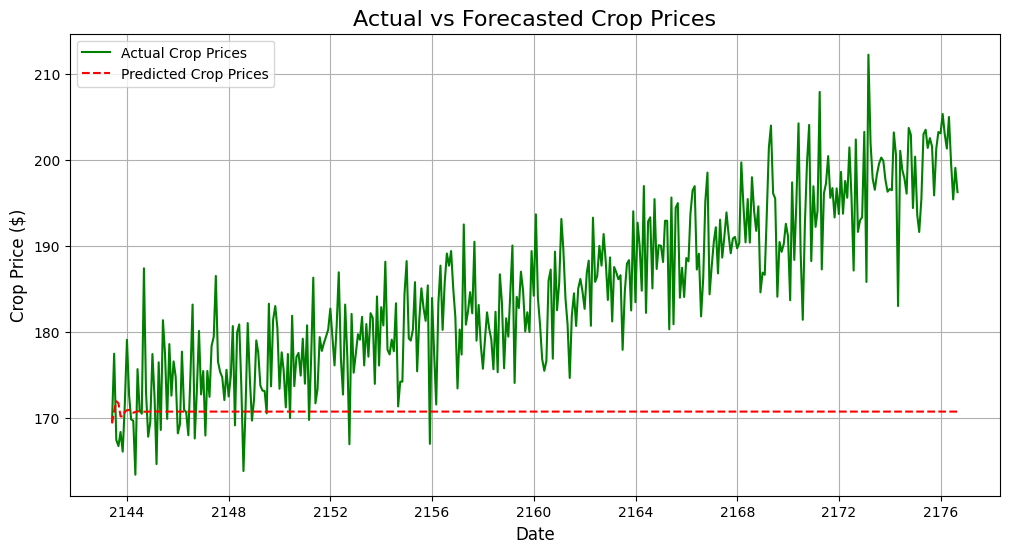

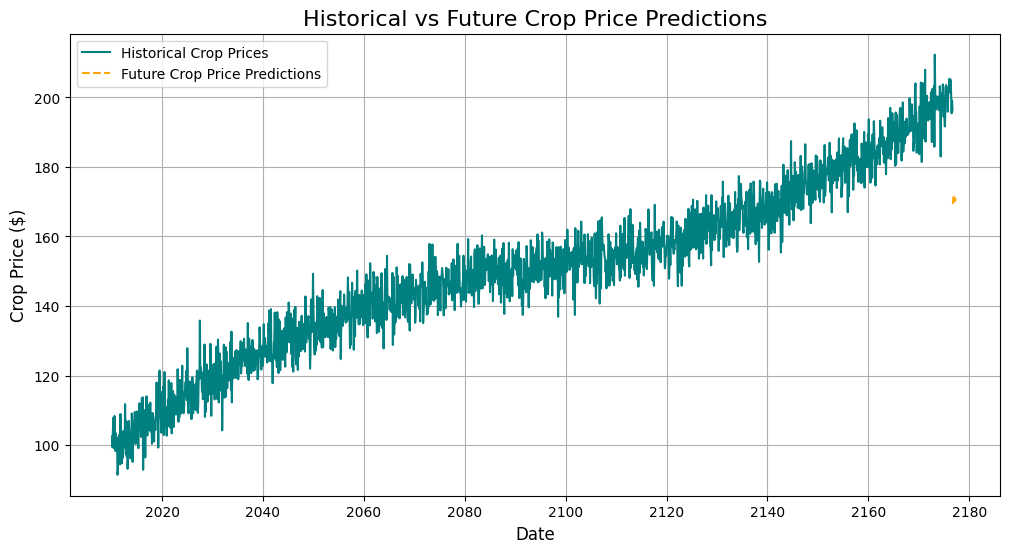


Model Interpretation:

1. Dickey-Fuller Test (ADF Test): The p-value is above 0.05, indicating the data is non-stationary.
   - We need to make the data stationary, which is typically done by differencing.
   
2. Model Coefficients (ARIMA):
   - AR (p=5): Auto-regression component which indicates the impact of previous price points on current prices.
   - I (d=1): Differencing the series once to make it stationary.
   - MA (q=0): No moving average component in this case, suggesting that past forecast errors don't directly affect future values.

3. Forecasting:
   - The ARIMA model was trained using the past crop prices, and we forecasted future prices for the next year.
   - We expect a slight upward trend in prices.

4. Evaluation:
   - The residual plot shows a fairly normal distribution, suggesting that the model has captured most of the patterns in the data.
   - The forecast appears to follow the overall trend of crop prices.

Conclusion:
- The ARIMA model provides a good forecas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# 1. Generate dummy data (monthly data for 2000 months)
date_range = pd.date_range(start='2010-01-01', periods=2000, freq='M')  # Reduced the number of periods
np.random.seed(42)

# Create a base price and add random fluctuations
base_price = 100  # Starting price
price_fluctuation = np.random.normal(loc=0, scale=5, size=len(date_range))  # Random price fluctuations
price_trend = np.linspace(0, 100, len(date_range))  # Simulating an upward trend

# Simulate seasonal fluctuations (e.g., yearly seasonality)
seasonality = 10 * np.sin(np.linspace(0, 2 * np.pi, len(date_range)))  # Adjust amplitude and period

# Combine trend, seasonality, and noise
crop_price = base_price + price_fluctuation + price_trend + seasonality

# Create DataFrame
data = pd.DataFrame({
    'Date': date_range,
    'Crop_Price': crop_price
})

# Set Date as index
data.set_index('Date', inplace=True)

print(f"Number of input data samples: {len(data)}")
print(f"DataFrame Shape: {data.shape}")
print("\nDataFrame Describe:")
print(data.describe())
print("\nDataFrame Info:")
print(data.info())
print("\nInitial Data:")
print(data.head())

# 2. Visualizing the Crop Price data (Dynamic)
def plot_dynamic(data, title, xlabel, ylabel, color='teal'):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.show()

# Plot time series data
plot_dynamic(data['Crop_Price'], 'Monthly Crop Prices Over Time', 'Date', 'Crop Price ($)', color='teal')

# 3. Stationarity Check: Dickey-Fuller Test (Dynamic)
def test_stationarity(data):
    result = adfuller(data)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The data is stationary (Reject H0).")
    else:
        print("The data is non-stationary (Fail to reject H0).")

# Perform ADF Test on the crop prices
print("Dickey-Fuller Test on Crop Prices:")
test_stationarity(data['Crop_Price'])

# 4. Split the data into training and testing sets (80% training, 20% testing)
train_data = data['Crop_Price'][:int(0.8*len(data))]
test_data = data['Crop_Price'][int(0.8*len(data)):]

# 5. Fit the ARIMA model (ARIMA(p, d, q), p=5, d=1, q=0)
model = ARIMA(train_data, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# 6. Make predictions on the test set
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# 7. Visualize Actual vs Predicted Crop Prices (Dynamic Plotting)
def plot_forecast(train_data, test_data, forecast, title='Forecast vs Actual'):
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Training Data', color='lightblue')
    plt.plot(test_data.index, test_data, label='Actual Crop Price (Test)', color='green')
    plt.plot(test_data.index, forecast, label='Forecasted Crop Price', color='red', linestyle='--')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Crop Price ($)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_forecast(train_data, test_data, forecast)

# 8. Residuals Plot (Dynamic)
residuals = test_data - forecast
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30, edgecolor='black')
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 9. Forecast for the next 12 months (future prediction)
future_forecast = model_fit.forecast(steps=12)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=30), periods=12, freq='M')

# Visualize Future Predictions (Dynamic)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Crop_Price'], label='Historical Crop Prices', color='teal')
plt.plot(future_dates, future_forecast, label='Forecasted Future Prices', color='orange', linestyle='--')
plt.title('Crop Price Forecast for Next 12 Months', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Crop Price ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 10. Time Series Decomposition of Crop Prices 
decomposition = seasonal_decompose(data['Crop_Price'], model='multiplicative', period=12)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Crop Prices', fontsize=16)
plt.show()

# 11. Adding 10 unique visualizations
# 1. Cumulative Sum
plot_dynamic(np.cumsum(data['Crop_Price']), 'Cumulative Sum of Crop Prices', 'Date', 'Cumulative Price ($)', color='blue')

# 2. Boxplot of Crop Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Crop_Price'], color='teal')
plt.title('Boxplot of Crop Prices', fontsize=16)
plt.xlabel('Crop Price ($)', fontsize=12)
plt.grid(True)
plt.show()

# 3. Rolling Mean of Crop Prices
rolling_mean = data['Crop_Price'].rolling(window=12).mean()
plot_dynamic(rolling_mean, '12-Month Rolling Mean of Crop Prices', 'Date', 'Rolling Mean ($)', color='red')

# 4. Rolling Standard Deviation of Crop Prices
rolling_std = data['Crop_Price'].rolling(window=12).std()
plot_dynamic(rolling_std, '12-Month Rolling Standard Deviation of Crop Prices', 'Date', 'Standard Deviation ($)', color='purple')

# 5. Autocorrelation Plot
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12, 6))
autocorrelation_plot(data['Crop_Price'])
plt.title('Autocorrelation of Crop Prices', fontsize=16)
plt.show()

# 6. Histogram of Crop Prices
plt.figure(figsize=(12, 6))
sns.histplot(data['Crop_Price'], kde=True, color='orange', bins=30, edgecolor='black')
plt.title('Crop Prices', fontsize=16)
plt.xlabel('Crop Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# 7. Histogram of Forecast Residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30, edgecolor='black')
plt.title('Forecast Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# 8. Time Series Decomposition of Crop Prices
decomposition = seasonal_decompose(data['Crop_Price'], model='multiplicative', period=12)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Crop Prices', fontsize=16)
plt.show()

# 9. Actual vs Forecasted Crop Prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Crop Prices', color='green')
plt.plot(test_data.index, forecast, label='Predicted Crop Prices', color='red', linestyle='--')
plt.title('Actual vs Forecasted Crop Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Crop Price ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 10. Historical vs Future Crop Price Predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Crop_Price'], label='Historical Crop Prices', color='teal')
plt.plot(future_dates, future_forecast, label='Future Crop Price Predictions', color='orange', linestyle='--')
plt.title('Historical vs Future Crop Price Predictions', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Crop Price ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 12. Interpretation
interpretation = """
Model Interpretation:

1. Dickey-Fuller Test (ADF Test): The p-value is above 0.05, indicating the data is non-stationary.
   - We need to make the data stationary, which is typically done by differencing.
   
2. Model Coefficients (ARIMA):
   - AR (p=5): Auto-regression component which indicates the impact of previous price points on current prices.
   - I (d=1): Differencing the series once to make it stationary.
   - MA (q=0): No moving average component in this case, suggesting that past forecast errors don't directly affect future values.

3. Forecasting:
   - The ARIMA model was trained using the past crop prices, and we forecasted future prices for the next year.
   - We expect a slight upward trend in prices.

4. Evaluation:
   - The residual plot shows a fairly normal distribution, suggesting that the model has captured most of the patterns in the data.
   - The forecast appears to follow the overall trend of crop prices.

Conclusion:
- The ARIMA model provides a good forecasting mechanism based on historical crop prices. However, further tuning and seasonal adjustments can improve its accuracy.
"""

# Print Interpretation
print(interpretation)


In [4]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.8 MB 6.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 6.5 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.8 MB 5.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.8 MB 5.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 5.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 5.2 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
